# Model Inspection Using Infery

  Infery's main objective is to provide a simple, fast Python API for inference across different platform and deep learning frameworks. However, to support Deci's researchers' growing needs, Infery has also accumulated multiple useful features for inspecting models and analyzing their architecture. In this notebook we focus on two of those features - *Netron integration* and *layer profiling*.

### Netron Integration

 Netron is a viewer for neural network, deep learning and machine learning models. It supports viewing models in ONNX, TensorFlow Lite, Caffe, Keras, ncnn, MNN, Core ML, and more. It also provides a Python package for starting a Netron session from within your code.
 Utilizing this package, Infery allows developers view their LoadedModel with a single line of code.

In [1]:
import infery

# Create an Infery LoadedModel object
onnx_model_path = "../models/resnet18_batchsize_64.onnx"
onnx_model = infery.load(model_path=onnx_model_path, framework_type="onnx")

# View the LoadedModel through Netron. Any input will stop serving the Netron viewer on the opened 8080 localhost port.
onnx_model.open_in_netron()

__init__ -INFO- Infery was successfully imported with 8 CPUS and 1 GPUS.
infery_manager -INFO- Loading model ../models/resnet18_batchsize_64.onnx to the GPU
infery_manager -INFO- Successfully loaded ../models/resnet18_batchsize_64.onnx to the GPU.
Serving '../models/resnet18_batchsize_64.onnx' at http://localhost:8080


2022-06-27 17:12:04.562119713 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer4.1.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:04.562138931 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer4.0.shortcut.1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:04.562142711 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer3.1.bn2.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:04.562145698 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer3.1.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:04.562148538 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNo

Stopping http://localhost:8080



### Profiling an ONNX Model

Infery also provides layer-level profiling capabilities. By simply loading a model with a `profiling=True` to Infery's `load` method, the returned LoadedModel may be used to generate Pandas DataFrames containing the time spent in each layer and the percentage of the total inference time that the layer took - simply call `get_layers_profile_dataframe`. Finally, the X top bottlenecks of the model may be fetched by passing X the `get_bottlenecks` method.

In [2]:
# Create an Infery LoadedModel object
onnx_model_path = "../models/resnet18_batchsize_64.onnx"
onnx_model = infery.load(
    model_path=onnx_model_path, framework_type="onnx", profiling=True
)

# Get timing DataFrame and the top 10 model bottlenecks (10 layers that take the longest to run)
profiling_dataframe = onnx_model.get_layers_profile_dataframe()
bottlenecks = onnx_model.get_bottlenecks(num_layers=10)

# Print the fetched 15 bottlenecks
print(bottlenecks.to_string())

infery_manager -INFO- Loading model ../models/resnet18_batchsize_64.onnx to the GPU
onnx_inferencer -WARNING- You have specified "profiling=True" thus runtime latency will be affected! Please do not use this engine for benchmarks.
infery_manager -INFO- Successfully loaded ../models/resnet18_batchsize_64.onnx to the GPU.
onnx_inferencer -INFO- Running warmup benchmark before profiling
base_inferencer -INFO- Benchmarking the model in batch size 1 and dimensions [(3, 224, 224)]...


2022-06-27 17:12:11.896490650 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer4.1.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:11.896521638 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer4.0.shortcut.1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:11.896528442 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer3.1.bn2.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:11.896533751 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer3.1.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:11.896538573 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNo

onnx_inferencer -INFO- Reloading the model for profiling...
onnx_inferencer -WARNING- You have specified "profiling=True" thus runtime latency will be affected! Please do not use this engine for benchmarks.
onnx_inferencer -INFO- Profiling using ONNXRuntime with batch size 1
base_inferencer -INFO- Benchmarking the model in batch size 1 and dimensions [(3, 224, 224)]...


2022-06-27 17:12:12.949930181 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer4.1.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:12.949953010 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer4.0.shortcut.1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:12.949956656 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer3.1.bn2.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:12.949959600 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer3.1.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:12.949962417 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNo

onnx_inferencer -INFO- Running warmup benchmark before profiling
base_inferencer -INFO- Benchmarking the model in batch size 1 and dimensions [(3, 224, 224)]...
onnx_inferencer -INFO- Reloading the model for profiling...
onnx_inferencer -WARNING- You have specified "profiling=True" thus runtime latency will be affected! Please do not use this engine for benchmarks.
onnx_inferencer -INFO- Profiling using ONNXRuntime with batch size 1
base_inferencer -INFO- Benchmarking the model in batch size 1 and dimensions [(3, 224, 224)]...


2022-06-27 17:12:13.512002250 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer4.1.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:13.512023259 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer4.0.shortcut.1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:13.512027396 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer3.1.bn2.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:13.512030448 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer 'module.layer3.1.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
2022-06-27 17:12:13.512033406 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNo

                 Layer Name     ms  Percentage
2       Conv_21_kernel_time  8.752   14.201107
8       Conv_53_kernel_time  5.926    9.615603
56   __token_13_kernel_time  4.426    7.181684
32  ___token_14_kernel_time  4.303    6.982103
5       Conv_37_kernel_time  3.389    5.499035
71    __token_9_kernel_time  3.273    5.310811
47            __kernel_time  3.238    5.254020
53   __token_12_kernel_time  3.083    5.002515
50    __token_0_kernel_time  3.075    4.989534
26  ___token_10_kernel_time  2.990    4.851612


And a simple example of visualizing the percentage and total time spent in the fetched bottlenecks

Text(0, 0.5, 'Percentage of Total Inference Time [%]')

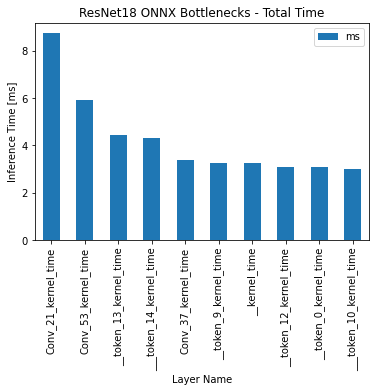

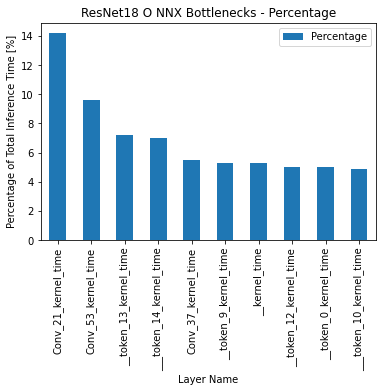

In [3]:
# Plot total time (ms) spend in each layer
ax = bottlenecks.plot.bar(
    x="Layer Name", y="ms", rot=90, title="ResNet18 ONNX Bottlenecks - Total Time"
)
ax.set_xlabel("Layer Name")
ax.set_ylabel("Inference Time [ms]")

# Plot total time (ms) spend in each layer
ax = bottlenecks.plot.bar(
    x="Layer Name",
    y="Percentage",
    rot=90,
    title="ResNet18 O NNX Bottlenecks - Percentage",
)
ax.set_xlabel("Layer Name")
ax.set_ylabel("Percentage of Total Inference Time [%]")


### Profiling a TensorRT Model

And a similar example of profiling a ResNet18, but this time after it has been compiled to TensorRT (notice this requires and Nvidia GPU compatible with RTX 3070 engines)

infery_manager -INFO- Loading model ../models/resnet18_batchsize_64_RTX3070.pkl to the GPU
CUDA Warning: The current TensorRT version was compiled with a non-supported CUDA version (11, 7, 0).
Please install CUDA in version {(11, 3, 0), (11, 1, 0), (11, 4, 0), (11, 2, 0)} or install another version of nvidia-tensorrt to use the GPU properly with TensorRT.
trt_engine -WARNING- You are trying to load a TensorRT checkpoint that was tailor-made for another version or TensorRT and infery-gpu.
You have infery-gpu in version 3.3.0 installed, which is incompatible with this checkpoint.
Please install infery-gpu~=1.0


[TensorRT] WARNING: Using an engine plan file across different models of devices is not recommended and is likely to affect performance or even cause errors.
[TensorRT] WARNING: TensorRT was linked against cuDNN 8.2.1 but loaded cuDNN 8.2.0


trt_engine -WARNING- You have specified "profiling=True" thus runtime latency will be affected! Please do not use this engine for benchmarks.
infery_manager -INFO- Successfully loaded ../models/resnet18_batchsize_64_RTX3070.pkl to the GPU.


[TensorRT] WARNING: TensorRT was linked against cuDNN 8.2.1 but loaded cuDNN 8.2.0


Text(0, 0.5, 'Percentage of Total Inference Time [%]')

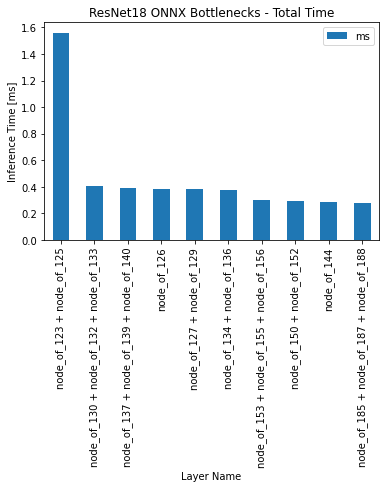

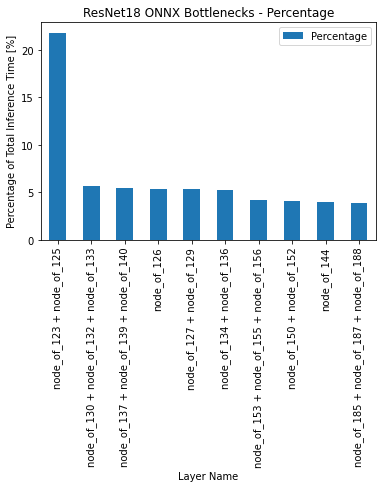

In [4]:
# Create an Infery LoadedModel object
onnx_model_path = "../models/resnet18_batchsize_64_RTX3070.pkl"
onnx_model = infery.load(
    model_path=onnx_model_path, framework_type="trt", profiling=True
)

# Get timing DataFrame and the top 10 model bottlenecks (10 layers that take the longest to run)
bottlenecks = onnx_model.get_bottlenecks(num_layers=10)

ax = bottlenecks.plot.bar(
    x="Layer Name", y="ms", rot=90, title="ResNet18 ONNX Bottlenecks - Total Time"
)
ax.set_xlabel("Layer Name")
ax.set_ylabel("Inference Time [ms]")

# Plot total time (ms) spend in each layer
ax = bottlenecks.plot.bar(
    x="Layer Name",
    y="Percentage",
    rot=90,
    title="ResNet18 ONNX Bottlenecks - Percentage",
)
ax.set_xlabel("Layer Name")
ax.set_ylabel("Percentage of Total Inference Time [%]")

Enjoy! :)